In [1]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
# sns.set_style('darkgrid')
import sys
import os
import seaborn
from  matplotlib import pyplot

In [2]:
def save_image(image_path, image_name):
    try:
        os.makedirs(image_path)
    except:
        pass

    output_path = f'{image_path}/{image_name}'
    print(output_path)
    plt.savefig(output_path, dpi=400, facecolor='white')

          T  functional        $\Delta$T
0     0.075    0.767396    $\Delta$T=0.1
1     0.175    0.741167    $\Delta$T=0.1
2     0.275    0.714181    $\Delta$T=0.1
3     0.375    0.686426    $\Delta$T=0.1
4     0.475    0.657428    $\Delta$T=0.1
...     ...         ...              ...
3682  2.496    0.138395  $\Delta$T=0.001
3683  2.497    0.138592  $\Delta$T=0.001
3684  2.498    0.138365  $\Delta$T=0.001
3685  2.499    0.138430  $\Delta$T=0.001
3686  2.500    0.138235  $\Delta$T=0.001

[5086 rows x 3 columns]


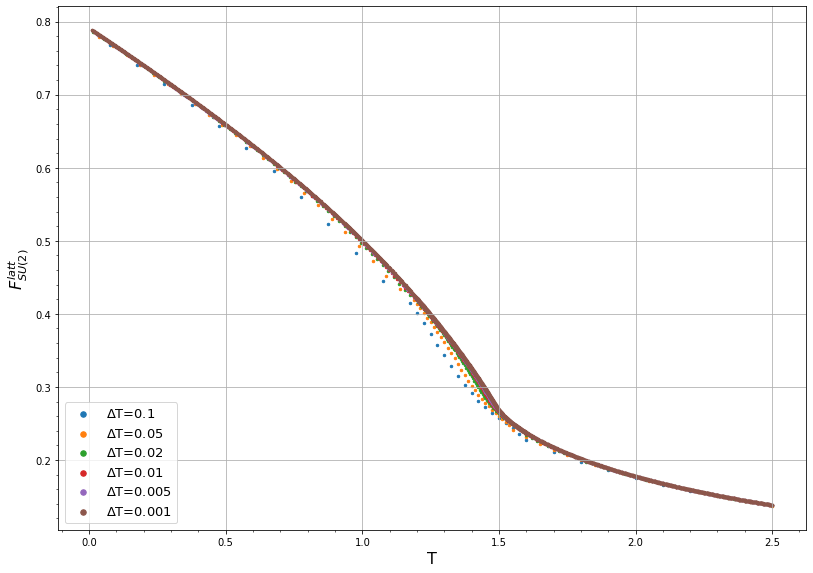

In [11]:
steps_arr = ['0.1', '0.05', '0.02', '0.01', '0.005', '0.001']
# steps_arr = ['0.005', '0.001']
path = '/home/ilya/soft/lattice/general_code/tests/cpu/code'
data = []
for step in steps_arr:
    data.append(pd.read_csv(f'{path}/thermalization_{step}'))
    data[-1][r'$\Delta$T'] = r'$\Delta$T=' + f'{step}'

data = pd.concat(data)
print(data)

fg = seaborn.FacetGrid(data=data, hue = r'$\Delta$T', height=8, aspect=1.4, legend_out=False)
# fg.fig.suptitle(f'Functional thermalization')
fg.map(plt.scatter, 'T', 'functional', s = 6).add_legend()
# plt.legend(loc='upper left')
fg.ax.set_xlabel("T", fontsize=16)
fg.ax.set_ylabel(r"$F_{SU(2)}^{latt}$", fontsize=16)
fg.ax.spines['right'].set_visible(True)
fg.ax.spines['top'].set_visible(True)
fg.ax.minorticks_on()
# fg.ax.tick_params(which='both', bottom=True,
#                   top=True, left=True, right=True)
plt.grid(dash_capstyle='round')

lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=13)

for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]

plt.savefig('/home/ilya/soft/lattice/observables/images/mag/thermalization_test/su2/thermalization_test_su2', dpi=400, facecolor='white')
# save_image('../../../images/mag/thermalization_test/su2', 'thermalization_test_su2')
plt.show()

     temperature  functional          $\Delta$T
0       1.250000    0.407799    $\Delta$T=0.015
1       1.235000    0.409189    $\Delta$T=0.015
2       1.220000    0.410768    $\Delta$T=0.015
3       1.205000    0.412336    $\Delta$T=0.015
4       1.190000    0.413921    $\Delta$T=0.015
..           ...         ...                ...
950     0.518632    0.696680  $\Delta$T=0.00375
951     0.514882    0.697924  $\Delta$T=0.00375
952     0.511132    0.699088  $\Delta$T=0.00375
953     0.507381    0.700278  $\Delta$T=0.00375
954     0.503631    0.701398  $\Delta$T=0.00375

[1657 rows x 3 columns]


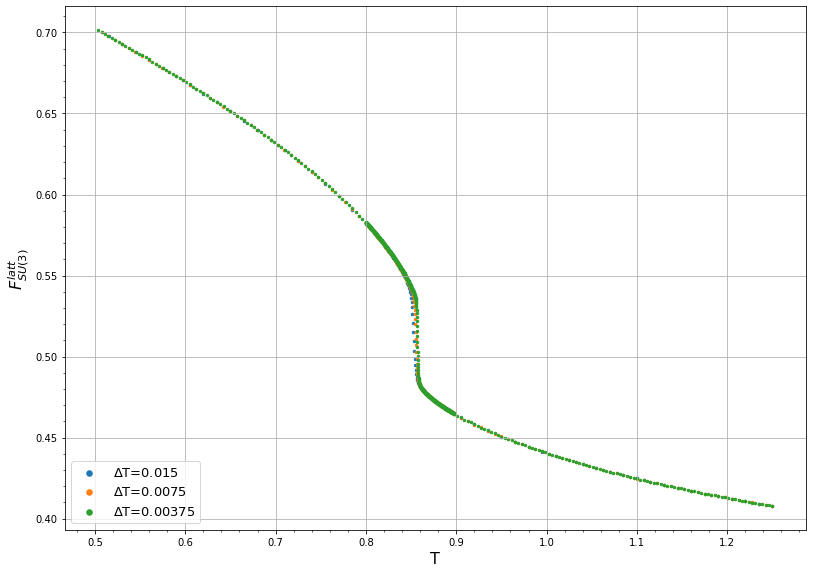

In [12]:
steps_arr = [50, 100, 200]
# steps_arr = ['0.005', '0.001']
path = '/home/ilya/soft/source/culgt/src/gaugefixing/apps/test_MAG/result/su3/gluodynamics/36^4/beta6.3'
data = []
for step in steps_arr:
    data.append(pd.read_csv(f'{path}/functional_{step}_0001'))
    dt = 0.75/step
    data[-1][r'$\Delta$T'] = r'$\Delta$T=' + f'{dt}'

data = pd.concat(data)
data = data[data['temperature'] <= 1.25]
print(data)

fg = seaborn.FacetGrid(data=data, hue = r'$\Delta$T', height=8, aspect=1.4, legend_out=False)
# fg.fig.suptitle(f'Functional thermalization')
fg.map(plt.scatter, 'temperature', 'functional', s = 6).add_legend()
# plt.legend(loc='upper left')
fg.ax.set_xlabel("T", fontsize=16)
fg.ax.set_ylabel(r"$F_{SU(3)}^{latt}$", fontsize=16)
fg.ax.spines['right'].set_visible(True)
fg.ax.spines['top'].set_visible(True)
fg.ax.minorticks_on()
# fg.ax.tick_params(which='both', bottom=True,
#                   top=True, left=True, right=True)
plt.grid(dash_capstyle='round')

lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=13)

for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]

try:
    os.makedirs('/home/ilya/soft/lattice/observables/images/mag/thermalization_test/su3')
except:
    pass

plt.savefig('/home/ilya/soft/lattice/observables/images/mag/thermalization_test/su3/thermalization_test_su3', dpi=600, facecolor='white')
# save_image('../../../images/mag/thermalization_test/su2', 'thermalization_test_su2')
plt.show()

      temperature  functional      $\Delta$T
0        1.250000    0.407385  $\Delta$T=100
1        1.242500    0.408082  $\Delta$T=100
2        1.235000    0.409152  $\Delta$T=100
3        1.227500    0.409350  $\Delta$T=100
4        1.220000    0.410086  $\Delta$T=100
...           ...         ...            ...
1932     0.509333    0.681355  $\Delta$T=400
1933     0.507458    0.681547  $\Delta$T=400
1934     0.505583    0.682459  $\Delta$T=400
1935     0.503708    0.682585  $\Delta$T=400
1936     0.501833    0.683716  $\Delta$T=400

[3370 rows x 3 columns]


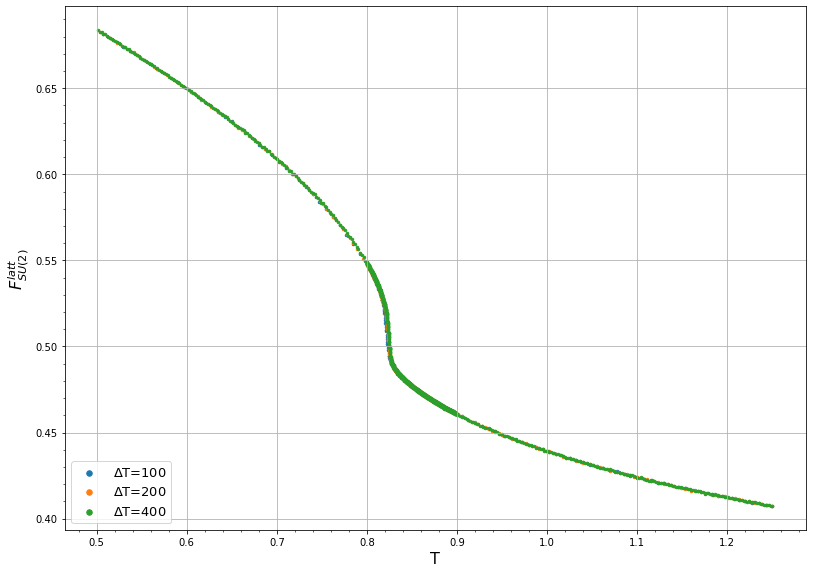

In [13]:
steps_arr = ['100', '200', '400']
# steps_arr = ['0.005', '0.001']
path = '/home/ilya/soft/source/culgt/src/gaugefixing/apps/test_MAG/result/su3/gluodynamics/24^4/beta6.0'
data = []
for step in steps_arr:
    data.append(pd.read_csv(f'{path}/functional_{step}_0001'))
    data[-1][r'$\Delta$T'] = r'$\Delta$T=' + f'{step}'

data = pd.concat(data)
data = data[data['temperature'] <= 1.25]
print(data)

fg = seaborn.FacetGrid(data=data, hue = r'$\Delta$T', height=8, aspect=1.4, legend_out=False)
# fg.fig.suptitle(f'Functional thermalization')
fg.map(plt.scatter, 'temperature', 'functional', s = 6).add_legend()
# plt.legend(loc='upper left')
fg.ax.set_xlabel("T", fontsize=16)
fg.ax.set_ylabel(r"$F_{SU(2)}^{latt}$", fontsize=16)
fg.ax.spines['right'].set_visible(True)
fg.ax.spines['top'].set_visible(True)
fg.ax.minorticks_on()
# fg.ax.tick_params(which='both', bottom=True,
#                   top=True, left=True, right=True)
plt.grid(dash_capstyle='round')

lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=13)

for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]

try:
    os.makedirs('/home/ilya/soft/lattice/observables/images/mag/thermalization_test/su3')
except:
    pass

plt.savefig('/home/ilya/soft/lattice/observables/images/mag/thermalization_test/su3/thermalization_test_su3_24^4', dpi=600, facecolor='white')
# save_image('../../../images/mag/thermalization_test/su2', 'thermalization_test_su2')
plt.show()

In [51]:
def plot_Coulomb_time(data):
    print()
    fg = seaborn.FacetGrid(data=data, height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'temperature', 'functional', marker="o", fmt='', linestyle = '').add_legend()

def plot_thermalization_Coulomb(path):
    df_data = pd.read_csv(path, index_col=None)

    df_data.groupby(['time']).apply(plot_Coulomb_time)

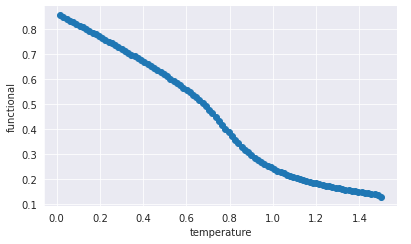

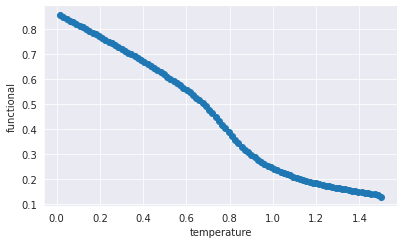

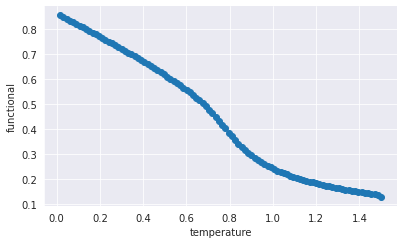

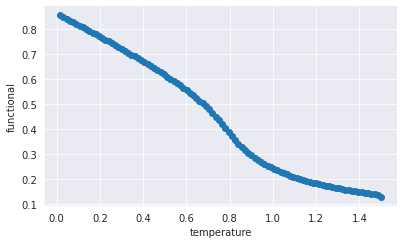

In [4]:
plot_thermalization_Coulomb('/home/ilya/soft/source/culgt/src/gaugefixing/apps/test_Coulomb/SA_test')

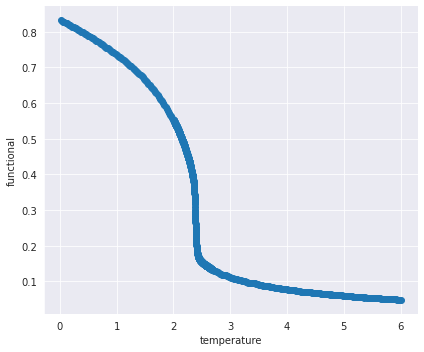

In [5]:
data = pd.read_csv("/home/ilya/soft/source/culgt/src/gaugefixing/apps/test_Landau/SA_test")
# print(data)
fg = seaborn.FacetGrid(data=data, height=5, aspect=1.2)
fg.map(plt.errorbar, 'temperature', 'functional', marker="o", fmt='', linestyle = '')

In [ ]:
data = pd.read_csv("../result/potential/on-axis/su2/trunin/Wr_mu=0.0_nt=20", header=0, names=['r/a', "T", "wilson_loop", "err"], delim_whitespace=True)
print(data)

In [2]:
def plot_time_dependence(path):
    df_data = pd.read_csv(f"{path}", index_col=None)
    

    # df_data = df_data[df_data['step'] <= 100]
    # df_data = df_data[df_data['step'] >= 75]
    df_data = df_data[df_data['T'] <= 0.5]
    df_data = df_data[df_data['T'] >= 0]
#     df_data = df_data[df_data['r/a'].isin(space_sizes)]
    fg = seaborn.FacetGrid(data=df_data, hue = 'T', height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'step', 'functional', marker="o", fmt='', linestyle = '').add_legend()
    
    image_path = f'/home/ilya/soft/source/culgt/SA_test'
    try:
        os.makedirs(image_path)
    except:
        pass
    
    image_path = f'{image_path}/SA_test'
    fg.savefig(image_path, dpi=400)
    plt.show()

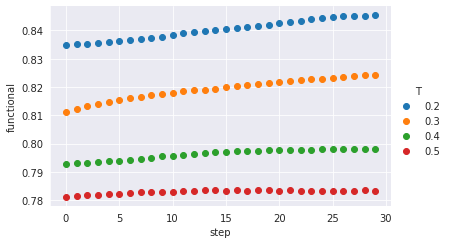

In [3]:
plot_time_dependence('/home/ilya/soft/lattice/general_code/tests/cpu/code/thermalization_Landau_U1')

In [4]:
for i in range(501, 509):
    print(i)
    plot_time_dependence(f'/home/ilya/soft/source/culgt/SA_test/data/SA_test_{i:04}')

501


KeyError: 'T'

In [6]:
def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass
    
    output_path = f'{image_path}/{image_name}'
    fg.savefig(output_path, dpi=400, facecolor='white')

In [7]:
# reading functional
def read_functional(paths, start, end, increment):
    data = []
    for path in paths:
        for i in range(start, end + 1):
            data_path = f'{path[0]}/functional_{i:04}'
            if(os.path.isfile(data_path)):
                data.append(pd.read_csv(data_path))
                data[-1]['num'] = i
                data[-1]['type'] = path[1]
                if 'copy' in data[-1]:
                    if increment:
                        data[-1]['copy'] = data[-1]['copy'] + 1
                else:
                    data[-1]['copy'] = 1
                data[-1]['time'] = path[2]

    return pd.concat(data)

In [8]:
def plot_functional(path):
    df_data = pd.read_csv(path)
    
#     df_data = df_data[df_data['r/a'].isin(space_sizes)]
    fg = seaborn.FacetGrid(data=df_data, height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'copy', 'functional', marker="o", fmt='', linestyle = '').add_legend()

def plot_functional_average(paths, start, end, name, copy_max1, copy_max2):
    data = []
    for path in paths:
        for i in range(start, end + 1):
            data_path = f'{path[0]}/{name}_{i:04}'
            if(os.path.isfile(data_path)):
                data.append(pd.read_csv(data_path))
                data[-1]['num'] = i
                data[-1]['type'] = path[1]
    
    df2 = pd.DataFrame(columns=['copy_max', 'functional_aver', 'type'])
    df_data = pd.concat(data)
    df2 = []
    for copy_max in df_data['copy'].unique():
        df_data1 = df_data[df_data['copy'] <= copy_max]
        groupby1 = df_data1.groupby(['num', 'type'])['functional'].max()
        df2.append(groupby1.groupby('type')\
                   .agg([('functional', np.mean), ('std', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index())
        df2[-1]['copy_max'] = copy_max
        
    
    df2 = pd.concat(df2)
    
    fg = seaborn.FacetGrid(data=df2, hue='type', height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'copy_max', 'functional', 'std', marker="o", fmt='', linestyle = '').add_legend()
    
    image_path = f'/home/ilya/soft/source/culgt/SA_test'
    try:
        os.makedirs(image_path)
    except:
        pass
    
    image_path = f'{image_path}/SA_copies'
    fg.savefig(image_path, dpi=400)
    plt.show()
    
def plot_time_functional(paths, start, end, copy_max, increment):
    data = read_functional(paths, start, end, increment)
    print(data)
    df2 = []
    for copy_max1 in range(1, copy_max + 1):
        df1 = data[data['copy'] <= copy_max1]
        df1 = df1.groupby(['num', 'type', 'time'])['functional'].max()
        print(copy_max1)
        df2.append(df1.groupby(['type', 'time'])\
                   .agg([('functional', np.mean), ('std', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index())
        df2[-1]['copy_max'] = copy_max1
        df2[-1]['time'] = df2[-1]['time'] * (copy_max1)
        
    
    df2 = pd.concat(df2)

    
    fg = seaborn.FacetGrid(data=df2, hue='type', height=5, aspect=1.61)
    plt.xscale('log')
    fg.map(plt.errorbar, 'time', 'functional', 'std', marker="o", fmt='', linestyle = '').add_legend()
    
    image_path = f'/home/ilya/soft/source/culgt/SA_test'
    try:
        os.makedirs(image_path)
    except:
        pass
    
    image_path = f'{image_path}/SA_copies'
    #fg.savefig(image_path, dpi=400)
    plt.show()

    copy  functional  num           type  time
0      1    0.779405    1  T_step=0.0008     4
1      2    0.779503    1  T_step=0.0008     4
2      3    0.779500    1  T_step=0.0008     4
3      4    0.779541    1  T_step=0.0008     4
0      1    0.779549    2  T_step=0.0008     4
..   ...         ...  ...            ...   ...
3      4    0.779476   49  T_step=0.0008     4
0      1    0.779623   50  T_step=0.0008     4
1      2    0.779659   50  T_step=0.0008     4
2      3    0.779621   50  T_step=0.0008     4
3      4    0.779635   50  T_step=0.0008     4

[196 rows x 5 columns]
1
2
3
4


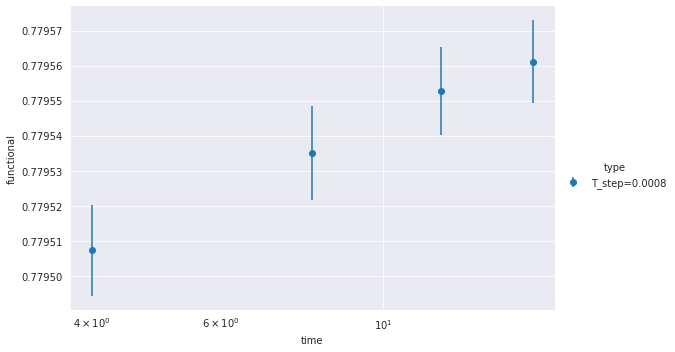

In [70]:
path1 = '../data/mag/functional/su2/su2_suzuki/48^4/beta2.7'
paths = [(f'{path1}/T_step=0.0008', 'T_step=0.0008', 4)]
plot_time_functional(paths, 1, 50, 4, False)

   copy functional   num        type  time
0     0   0.839597     1    steps=25     1
1     1   0.839759     1    steps=25     1
2     2   0.839683     1    steps=25     1
3     3   0.839756     1    steps=25     1
0     0   0.839692     2    steps=25     1
..  ...        ...   ...         ...   ...
3     3   0.839884  2134  steps=2000    80
0     0   0.839739  2135  steps=2000    80
1     1    0.83996  2135  steps=2000    80
2     2   0.840073  2135  steps=2000    80
3     3   0.840076  2135  steps=2000    80

[51171 rows x 5 columns]
1
2
3
4


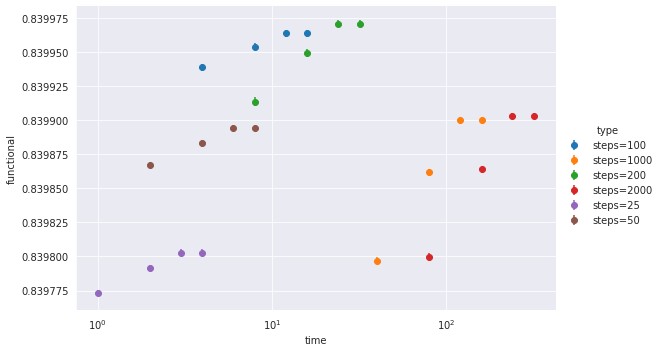

In [12]:
path1 = '../data/mag/functional/su3/gluodynamics/36^4/beta6.3'
paths = [(f'{path1}/steps_25/copies=4', 'steps=25', 1), (f'{path1}/steps_50/copies=4', 'steps=50', 2),
         (f'{path1}/steps_100/copies=4', 'steps=100', 4), (f'{path1}/steps_200/copies=4', 'steps=200', 8),
         (f'{path1}/steps_500/copies=4', 'steps=500', 20), (f'{path1}/steps_1000/copies=4', 'steps=1000', 40),
         (f'{path1}/steps_2000/copies=4', 'steps=2000', 80)]
plot_time_functional(paths, 1, 5000, 4, False)


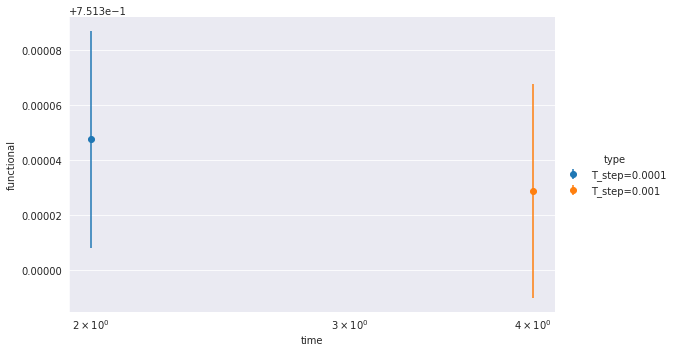

In [34]:
path1 = '../data/mag/functional/su2/su2_suzuki/24^4/beta2.5'
paths = [(f'{path1}/T_step=0.0001', 'T_step=0.0001', 1), (f'{path1}/T_step=0.001', 'T_step=0.001', 2)]
plot_time_functional(paths, 1, 100, 1)

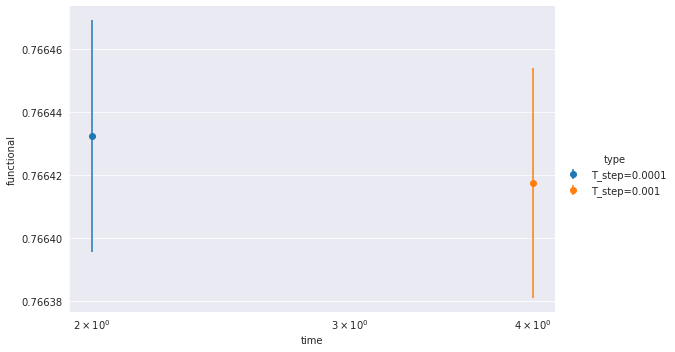

In [35]:
path1 = '../data/mag/functional/su2/su2_suzuki/24^4/beta2.6'
paths = [(f'{path1}/T_step=0.0001', 'T_step=0.0001', 1), (f'{path1}/T_step=0.001', 'T_step=0.001', 2)]
plot_time_functional(paths, 1, 100, 1)

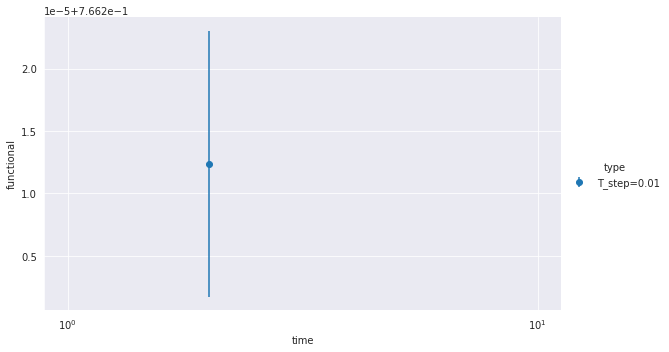

In [37]:
path1 = '../data/mag/functional/su2/su2_suzuki/48^4/beta2.6'
paths = [(f'{path1}/T_step=0.01', 'T_step=0.01', 1)]
plot_time_functional(paths, 1, 87, 1)

    copy  functional  num           type  time
0      1    0.779605    1  T_step=0.0002    16
0      1    0.779586    2  T_step=0.0002    16
0      1    0.779622    3  T_step=0.0002    16
0      1    0.779649    4  T_step=0.0002    16
0      1    0.779487    5  T_step=0.0002    16
..   ...         ...  ...            ...   ...
3      4    0.779356   49  T_step=0.0032     1
0      1    0.779462   50  T_step=0.0032     1
1      2    0.779514   50  T_step=0.0032     1
2      3    0.779464   50  T_step=0.0032     1
3      4    0.779597   50  T_step=0.0032     1

[735 rows x 5 columns]
1
2
3
4


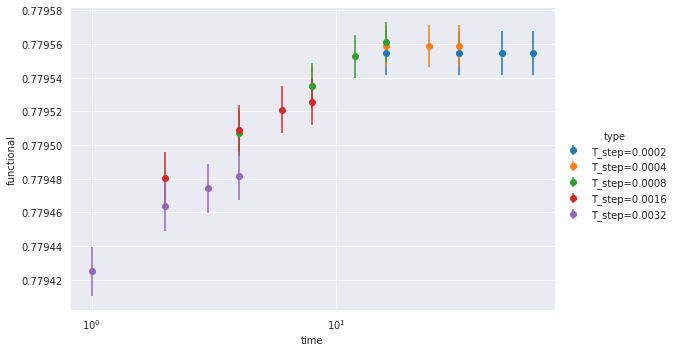

In [73]:
path1 = '../data/mag/functional/su2/su2_suzuki/48^4/beta2.7'
paths = [(f'{path1}/T_step=0.0002', 'T_step=0.0002', 16), (f'{path1}/T_step=0.0004', 'T_step=0.0004', 8),
         (f'{path1}/T_step=0.0008', 'T_step=0.0008', 4), (f'{path1}/T_step=0.0016', 'T_step=0.0016', 2),
         (f'{path1}/T_step=0.0032', 'T_step=0.0032', 1)]
plot_time_functional(paths, 1, 87, 4, False)

    copy  functional  num          type   time
0      1    0.790935    1   T_step=0.01    1.0
1      2    0.790733    1   T_step=0.01    1.0
2      3    0.790981    1   T_step=0.01    1.0
0      1    0.790762    2   T_step=0.01    1.0
1      2    0.790727    2   T_step=0.01    1.0
..   ...         ...  ...           ...    ...
0      1    0.791100   45  T_step=5e-05  200.0
0      1    0.791136   46  T_step=5e-05  200.0
0      1    0.790967   48  T_step=5e-05  200.0
0      1    0.791042   49  T_step=5e-05  200.0
0      1    0.790978   50  T_step=5e-05  200.0

[576 rows x 5 columns]
1
2
3
4


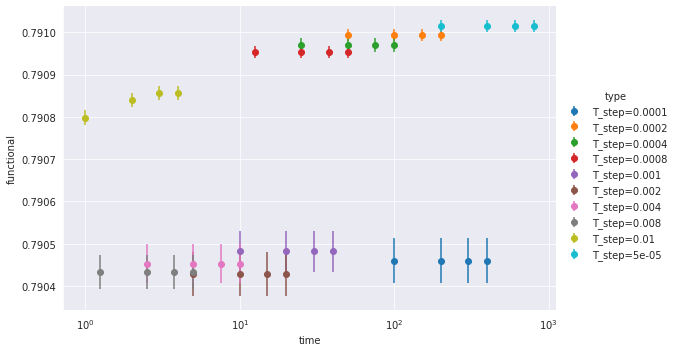

In [74]:
path1 = '../data/mag/functional/su2/su2_suzuki/48^4/beta2.8'
paths = [(f'{path1}/T_step=0.01', 'T_step=0.01', 1), (f'{path1}/T_step=0.001', 'T_step=0.001', 10), 
         (f'{path1}/T_step=0.002', 'T_step=0.002', 5), (f'{path1}/T_step=0.004', 'T_step=0.004', 2.5), 
         (f'{path1}/T_step=0.008', 'T_step=0.008', 1.25), (f'{path1}/T_step=0.0004', 'T_step=0.0004', 25),
         (f'{path1}/T_step=0.0008', 'T_step=0.0008', 12.5), (f'{path1}/T_step=0.0002', 'T_step=0.0002', 50),
         (f'{path1}/T_step=0.0001', 'T_step=0.0001', 100), (f'{path1}/T_step=5e-05', 'T_step=5e-05', 200)]
plot_time_functional(paths, 1, 87, 4, False)

    copy  functional   num        type  time
0      1    0.822204     1    steps_25     1
1      2    0.822373     1    steps_25     1
2      3    0.822511     1    steps_25     1
3      4    0.822579     1    steps_25     1
0      1    0.822485     2    steps_25     1
..   ...         ...   ...         ...   ...
3      4    0.822527  4999  steps_2000    80
0      1    0.822002  5000  steps_2000    80
1      2    0.822304  5000  steps_2000    80
2      3    0.822401  5000  steps_2000    80
3      4    0.822435  5000  steps_2000    80

[133500 rows x 5 columns]
1
2
3
4


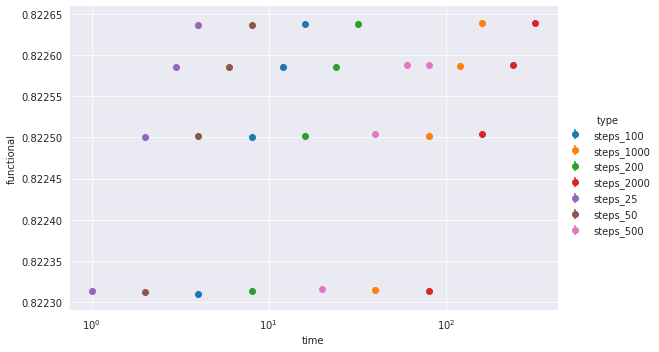

In [81]:
path1 = '../data/mag/functional/su3/gluodynamics/24^4/beta6.0'
paths = [(f'{path1}/steps_25/copies=4', 'steps_25', 1), (f'{path1}/steps_50/copies=4', 'steps_50', 2),
         (f'{path1}/steps_100/copies=4', 'steps_100', 4), (f'{path1}/steps_200/copies=4', 'steps_200', 8),
         (f'{path1}/steps_500/copies=3', 'steps_500', 20), (f'{path1}/steps_1000/copies=4', 'steps_1000', 40),
         (f'{path1}/steps_2000/copies=4', 'steps_2000', 80)]
plot_time_functional(paths, 1, 5000, 4, True)

    copy  functional   num        type  time
0      1    0.839513     1    steps_25     1
1      2    0.839595     1    steps_25     1
2      3    0.839648     1    steps_25     1
3      4    0.839689     1    steps_25     1
0      1    0.839838     2    steps_25     1
..   ...         ...   ...         ...   ...
3      4    0.839884  2134  steps_2000    80
0      1    0.839739  2135  steps_2000    80
1      2    0.839960  2135  steps_2000    80
2      3    0.840073  2135  steps_2000    80
3      4    0.840076  2135  steps_2000    80

[56146 rows x 5 columns]
1
2
3
4


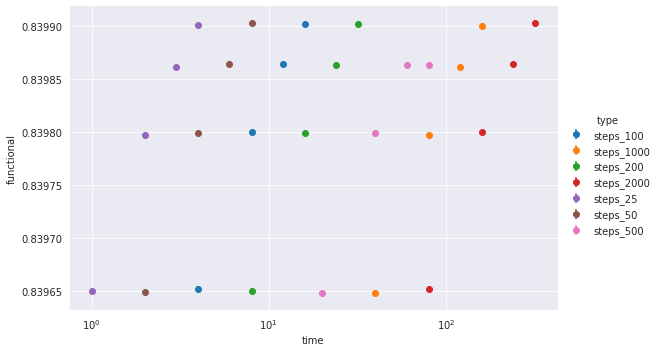

In [80]:
path1 = '../data/mag/functional/su3/gluodynamics/36^4/beta6.3'
paths = [(f'{path1}/steps_25/copies=4', 'steps_25', 1), (f'{path1}/steps_50/copies=4', 'steps_50', 2),
         (f'{path1}/steps_100/copies=4', 'steps_100', 4), (f'{path1}/steps_200/copies=4', 'steps_200', 8),
         (f'{path1}/steps_500/copies=3', 'steps_500', 20), (f'{path1}/steps_1000/copies=4', 'steps_1000', 40),
         (f'{path1}/steps_2000/copies=4', 'steps_2000', 80)]
plot_time_functional(paths, 1, 5000, 4, True)

In [5]:
def read_functional_su2(paths, start, end, name):
    data = []
    for path in paths:
        for i in range(start, end + 1):
            data_path = f'{path[0]}/{name}_{i:04}'
            if(os.path.isfile(data_path)):
                data.append(pd.read_csv(data_path))
                data[-1]['type'] = path[1]
    return pd.concat(data)

def functionals_su2(paths, start, end, image_path, image_name):
    data = read_functional_su2(paths, start, end, 'functional')

    data = data.groupby(['type'])\
                   .agg([('mean', np.mean), ('std', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index()

    data.columns = ['type', 'functional', 'std']

    fg = seaborn.FacetGrid(data=data, height=5, aspect=1.61)
    # plt.xscale('log')
    fg.map(plt.errorbar, 'type', 'functional', 'std', marker="o", fmt='', linestyle = '').add_legend()

    save_image(image_path, image_name, fg)

NameError: name 'save_image' is not defined

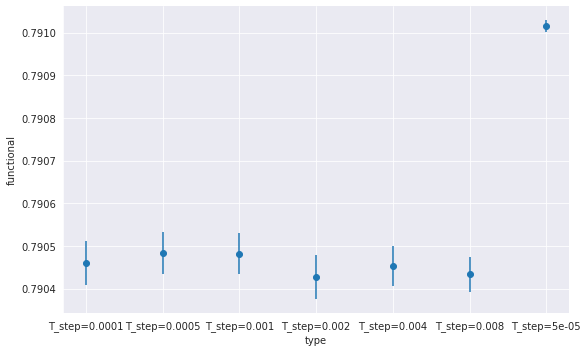

In [9]:
path1 = '../data/mag/functional/su2/su2_suzuki/48^4/beta2.8'
paths = [(f'{path1}/T_step=0.0005', 'T_step=0.0005'), (f'{path1}/T_step=0.001', 'T_step=0.001'),
        (f'{path1}/T_step=0.0001', 'T_step=0.0001'), (f'{path1}/T_step=5e-05', 'T_step=5e-05'),
        (f'{path1}/T_step=0.002', 'T_step=0.002'), (f'{path1}/T_step=0.004', 'T_step=0.004'),
        (f'{path1}/T_step=0.008', 'T_step=0.008')]
image_path = '../images/mag/functional/su2/su2_suzuki/48^4/beta2.8'
image_name = 'functional'

functionals_su2(paths, 1, 50, image_path, image_name)